# Analysis of Global Plastics Production Data
**SCIE1500**

*Atakelty Hailu, Leonardo Portes*

*February 20, 2022*

---

In [1]:
# loading packages

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## INSTRUCTIONS

1. Folow this [link](https://ourworldindata.org/plastic-pollution?utm_source=newsletter) to download the dataset *global-plastics-production.csv*.

2. Read in the data on global plastics production, visualise and explore it, and then determine what type of equation or mathematical model would describe the relationship between production and time. 

3. The exercises can also be done in Excel or other software (e.g. Python).

 

---
Step 1: read in downloaded data and explore
---



In [20]:
gpp = pd.read_csv("global-plastics-production.csv")

gpp

,Entity,Code,Year,Global plastics production (million tonnes)
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000
...,...,...,...,...
61,World,OWID_WRL,2011,325000000
62,World,OWID_WRL,2012,338000000
63,World,OWID_WRL,2013,352000000
64,World,OWID_WRL,2014,367000000


**Questions**

1. What is the min, max, mean of gpp?
2. What are the log values of these statistics (min, max, mean)?

In [21]:
# Q1

gpp["Global plastics production (million tonnes)"].describe()

count    6.600000e+01
mean     1.185303e+08
std      1.126182e+08
min      2.000000e+06
25%      2.075000e+07
50%      7.650000e+07
75%      1.985000e+08
max      3.810000e+08
Name: Global plastics production (million tonnes), dtype: float64

In [22]:
# Q2

print(np.log10(gpp["Global plastics production (million tonnes)"].min()))
print(np.log10(gpp["Global plastics production (million tonnes)"].max()))
print(np.log10(gpp["Global plastics production (million tonnes)"].mean()))

6.301029995663981
8.58092497567562
8.073829394704156


Alternative way to answear Q1 and Q2: 

In [24]:
# Q1, alternative way

ggp_min  = gpp["Global plastics production (million tonnes)"].min()
ggp_max  = gpp["Global plastics production (million tonnes)"].max()
ggp_mean = gpp["Global plastics production (million tonnes)"].mean()

print("GGP min is", ggp_min)
print("GGP max is", ggp_max)
print("GGP mean is", ggp_mean)

GGP min is 2000000
GGP max is 381000000
GGP mean is 118530303.03030303


In [25]:
# Q2, alternative way

log10_ggp_min  = np.log10(ggp_min)
log10_ggp_max  = np.log10(ggp_max)
log10_ggp_mean = np.log10(ggp_mean)

print("The Log10 of GGP min is", log10_ggp_min)
print("The Log10 of GGP max is", log10_ggp_max)
print("The Log10 of GGP mean is", log10_ggp_mean)

The Log10 of GGP min is 6.301029995663981
The Log10 of GGP max is 8.58092497567562
The Log10 of GGP mean is 8.073829394704156


---
Step 2: extract variables and use shorter simpler names
---

1. Change the last column title from *Global plastics production (million tonnes)* to, for example, *GPP (million tonnes)*

2. Also, create a time trend based on year (for easier modelling) as it is the passage of time rather than the actual calendar year that we are interested in. t is also smaller than calendar year.

In [26]:
# shorter simpler names
gpp.rename(columns={'Global plastics production (million tonnes)':'GPP (million tonnes)'}, inplace = True)

gpp

,Entity,Code,Year,GPP (million tonnes)
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000
...,...,...,...,...
61,World,OWID_WRL,2011,325000000
62,World,OWID_WRL,2012,338000000
63,World,OWID_WRL,2013,352000000
64,World,OWID_WRL,2014,367000000


In [27]:
# create a time trend based on year 

gpp["t"] = gpp["Year"] - 1949

gpp

,Entity,Code,Year,GPP (million tonnes),t
0,World,OWID_WRL,1950,2000000,1
1,World,OWID_WRL,1951,2000000,2
2,World,OWID_WRL,1952,2000000,3
3,World,OWID_WRL,1953,3000000,4
4,World,OWID_WRL,1954,3000000,5
...,...,...,...,...,...
61,World,OWID_WRL,2011,325000000,62
62,World,OWID_WRL,2012,338000000,63
63,World,OWID_WRL,2013,352000000,64
64,World,OWID_WRL,2014,367000000,65


---
Step 3: visualise data
---

* Plot the GGP as function of year and the new variable "t". 

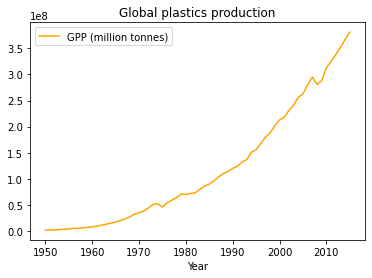

In [29]:
# Plotting data

gpp.plot(x="Year", y="GPP (million tonnes)", 
         title="Global plastics production",
         color="orange");

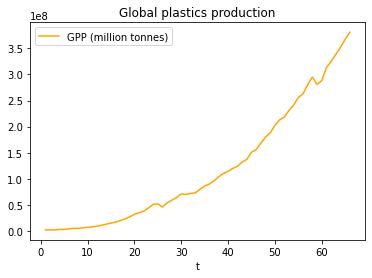

In [30]:
# Plotting data

gpp.plot(x="t", y="GPP (million tonnes)", 
         title="Global plastics production",
         color="orange");

---
Step 4: Explore effect of scaling and transformation (logs)
---

1. Effects of scaling:  
    1. Add a column expressing the plastic production in trillion tonnes.
    2. Plot the result and add a horizontal line at the mean value.

In [31]:
# Add a column expressing the plastic production in trillion tonnes

gpp["GPP (trillion tonnes)"] = gpp["GPP (million tonnes)"]/1000000

gpp

,Entity,Code,Year,GPP (million tonnes),t,GPP (trillion tonnes)
0,World,OWID_WRL,1950,2000000,1,2.0
1,World,OWID_WRL,1951,2000000,2,2.0
2,World,OWID_WRL,1952,2000000,3,2.0
3,World,OWID_WRL,1953,3000000,4,3.0
4,World,OWID_WRL,1954,3000000,5,3.0
...,...,...,...,...,...,...
61,World,OWID_WRL,2011,325000000,62,325.0
62,World,OWID_WRL,2012,338000000,63,338.0
63,World,OWID_WRL,2013,352000000,64,352.0
64,World,OWID_WRL,2014,367000000,65,367.0


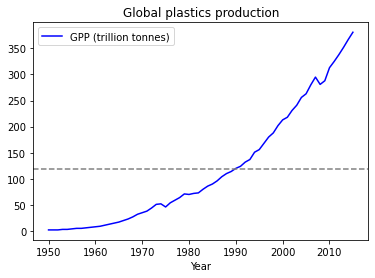

In [56]:
# Plot the result and add a horizontal line at the mean value.

ax = gpp.plot(x="Year", y="GPP (trillion tonnes)", title="Global plastics production", 
         color="blue");

ax.axhline(y=gpp["GPP (trillion tonnes)"].mean(), ls="--", color="gray");

**Question**
* Why do think we need to scale data?

(Your answer)

2. Effects of transformation (logs):  
    1. Plot using a log scale for the y-axis
    2. Add a column expressing the log of the plastic production in million tonnes.
    2. Plot the logarithmic values, from item B, and compare with the log scale plot of item A.
    
Let’s now use a log scale for the y-axis, where equal distances (50 to 100, and 100 to 200) represent
a doubling of the value, rather than the addition of the same amount.

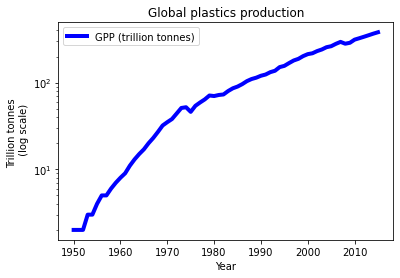

In [39]:
# Plot using a log scale for the y-axis

gpp.plot(x="Year", y="GPP (trillion tonnes)", title="Global plastics production", 
         color="blue", lw=4, 
         logy=True, ylabel="Trillion tonnes \n (log scale)");

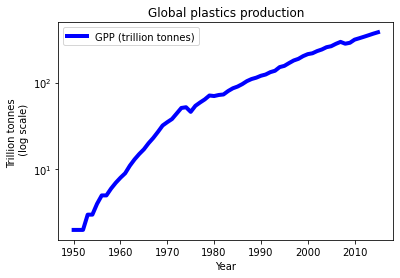

In [40]:
# plotting | alternative way with simplified yticks

gpp.plot(x="Year", y="GPP (trillion tonnes)", title="Global plastics production", 
         color="blue", lw=4, 
         logy="sym", ylabel="Trillion tonnes \n (log scale)");

Let’s create logged value for the production data.

In [41]:
# Add a column expressing the log of the plastic production in million tonnes.

gpp["GPP (million tonnes, log)"] = np.log10(gpp["GPP (million tonnes)"])

gpp

,Entity,Code,Year,GPP (million tonnes),t,GPP (trillion tonnes),"GPP (million tonnes, log)"
0,World,OWID_WRL,1950,2000000,1,2.0,6.301030
1,World,OWID_WRL,1951,2000000,2,2.0,6.301030
2,World,OWID_WRL,1952,2000000,3,2.0,6.301030
3,World,OWID_WRL,1953,3000000,4,3.0,6.477121
4,World,OWID_WRL,1954,3000000,5,3.0,6.477121
...,...,...,...,...,...,...,...
61,World,OWID_WRL,2011,325000000,62,325.0,8.511883
62,World,OWID_WRL,2012,338000000,63,338.0,8.528917
63,World,OWID_WRL,2013,352000000,64,352.0,8.546543
64,World,OWID_WRL,2014,367000000,65,367.0,8.564666


Now, we have two options:

1. We could plot the raw data (million tonnes) and use a log scale on the y-axis.
2. Or we could actually plot the logged value of the data: **GPP (million tonnes, log)**. 

**Compare the effects of using log scale in plotting against transforming the data (using logs) and then plotting the transformed data.**

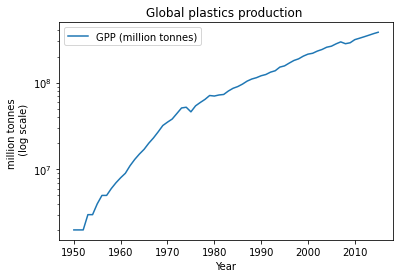

In [43]:
# plot the raw data (million tonnes) and use a log scale on the y-axis

gpp.plot(x="Year", y="GPP (million tonnes)", title="Global plastics production ",
        logy=True, ylabel="million tonnes \n (log scale)");

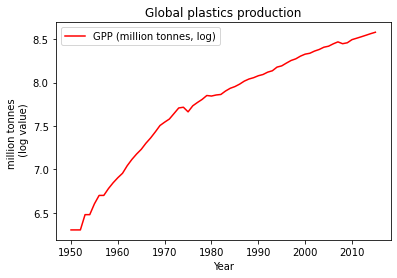

In [44]:
# plot the logged value of the data: GPP (million tonnes, log)

gpp.plot(x="Year", y="GPP (million tonnes, log)", title="Global plastics production", 
         color="red", ylabel="million tonnes \n (log value)");

Comparision is easier if we plot side by side!

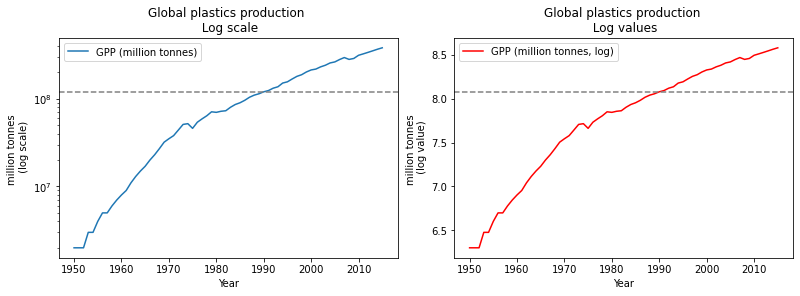

In [55]:
fig, axes = plt.subplots(1,2, figsize=(11,4), constrained_layout=True)

# Log scale subplot
gpp.plot(x="Year", y="GPP (million tonnes)", title="Global plastics production \n Log scale",
        logy=True, ylabel="million tonnes \n (log scale)", ax=axes[0]);

axes[0].axhline(y=gpp["GPP (million tonnes)"].mean(), ls="--", color="gray");


# Log values subplot
gpp.plot(x="Year", y="GPP (million tonnes, log)", title="Global plastics production \n Log values", 
         color="red", ylabel="million tonnes \n (log value)", ax=axes[1]);

axes[1].axhline(y=np.log10(gpp["GPP (million tonnes)"].mean()), ls="--", color="gray");

---
Step 5: What is the story about the growth rates in plastic production?
---

1. Calculate the growth rates in plastic production for each of the years between 1951 and 2015 (inclusive)? 

2. Summarise the growth rates: determine minimum, maximum, median and mean growth rates? 

3. Write down your observations about the growth rates.

---
Step 6: Determine if an exponential relationship is appropriate
---

Do the plots done so far suggest a functional form? What do we know about how plastic production increases over time. One thing we know for sure is that the increase in production is increasing over time (i.e, it is speeding up!). Therefore, a linear relationship (such as gpp = a + b ∗ t) is not appropriate. And that is clear from the plot which is closer to being exponential or a quadratic curve opening up than to a linear curve.

We can also assess whether an exponential relationship is appropriate by plotting the log of the gpp against time and checking if that appears linear. This is because if gpp grown exponentially over time (i.e. gpp = a.e rt , where r is the rate of exponential growth), then that relationship would be a linear relationship between time and the logged value of gpp. Why? gpp = a.e rt and log(gpp) = a + rt represent the same process or relationship. In other words, an explonential relationship implies that the rate of growth or proportional increase in gpp is constant over time. So, let’s check if what we have looks like this: log(gpp) = a + rt, i.e. log(gpp) is a linear function of time. Does the plot below appear linear or very close to being linear?

How would you fit such a curve? If you have no knowledge of curve, you could fit the curve by trial and error (but different people would end up with different stories) or you could fix a to the log of production at the start of the period and fix r at the average annual growth rate that would bring the gpp up to its 2015 value (ask if you are not sure how this works). However, the focus of our exercise is not curve fitting and we will not get into details here. We can also use curve fitting methods (statistical techniques) to estimate the parameters for exponential relationship by regressing log(gpp) on t in Excel or some other software. If we did that, the fitted model would be log(gpp) = 15.252292 + 0.077005 ∗ t and the linear approximation plotted against the actual data would look like as follows. We will call this model 1 (**M1**).

**If we do the plots in natural units (not logs), this is what we have. Is the model good?**

The fitted exponential curve provides a decent approximation to the actual change in plastic production but tends to grossly overestimate trens in production towards the end of the period. Therefore, we need to be cautious about using such a fit. In fact, we could explore other forms that would improve out description of the process.

---
Step 6: Have a go at another functional form
---

Based on the plot of log of plastic production against time, we can see that the relationship between the logged value of plastic production and time appears quadratic. 

Therefore, 

$log(gpp) = a+bt+ct^2$

where b is positive but c is negative could be better. We could fit such a curve by trial and error (e.g. in Excel) but we could also estimate is appropriately using curve fitting techniques in Excel or other software, to obtain the following: 

* $log(gpp) = 14.38 + 0.1539t − 0.001147t^2$. 

* or $gpp = 1760519e^{0.1539t−0.001147t^2}$. 

We will call this model 2 (**M2**).

In [ ]:
# comparision is easier if we overlap the plots

---
Step 7: Student exercise
---

* What does the model $log(gpp) = 14.38 + 0.1539t − 0.001147t^2$ imply about the predicted growth rate plastic production between 1960 and 1961, between 2000 and 2001 and between 2010 and 2011? How do these compare with the actual growth rates and with the prediction from the exponential equation?

* What does this model tell us about the maximum level global plastic production could reach? When would that be reached according the model?

* Generate a plot that includes the following three curves: a plot of the actual plastics production, the predicted values accoring to **M1** and **M2**. See the following:

Is it wise to use a model (**M1**, **M2**, or any other similar model) to predict plastic production far into the future? Explian why?